<!-- ---------------------------------------------------- -->
  <div class="col-sm-3 col-md-3 col-lg-3">
	<!-- logo -->  
    <div class="img-responsive">
      <img src="https://www.dropbox.com/s/220ncn0o5danuey/pandas-ipython-tutorials-hedaro.jpg?dl=1" title="Pandas Tutorial | Hedaro" alt="Pandas Tutorial | Hedaro">    
    </div>
	<!-- logo -->	
  </div>
<!-- ---------------------------------------------------- --> 
  <div class="col-sm-6 col-md-6 col-lg-6">
	<!-- Pandas Tutorial -->  
	  <center>
	    <br>
        <h1>Data Analysis - Single Exponential Smoothing</h1>
        <p>Learn how to use Pandas and Statmodels to perform Single <strong>Exponential Smoothing</strong> on time series data</p>
	  </center>	
    <!-- Pandas Tutorial -->	
  </div>
<!-- ---------------------------------------------------- -->

In [1]:
# pandas imports
import pandas as pd
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

# statsmodels imports
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm

# matplotlib imports
import matplotlib.pyplot as plt
import matplotlib as mpl # only needed to get version
%matplotlib inline

In [2]:
print('pandas version: ' + pd.__version__)
print('pandas version: ' + sm.version.version)
print('matplotlib version: ' + mpl.__version__)

pandas version: 0.22.0
pandas version: 0.9.0rc1
matplotlib version: 1.5.1


# Resources Used

* [Statsmodels Notebook- not rendered](https://github.com/statsmodels/statsmodels/blob/master/examples/notebooks/exponential_smoothing.ipynb)

* [Statsmodels Notebook- rendered](https://github.com/tvanzyl/statsmodels/blob/881588c33899554ccd8df0da59be8cf806c8b973/examples/notebooks/exponential_smoothing.ipynb) - This notebook was the starting point for this tutorial.

* [Time Series Book](https://www.otexts.org/fpp/7) - Note that some of the text in this tutorial was copied exactly from this book. In certain sections I paraphrased the text from the book to make it easier to understand. 

# Definitions  

* The ***[SSE](https://en.wikipedia.org/wiki/Residual_sum_of_squares)*** is the sum of the squared errors  
* A ***trend*** exists when there is a long-term increase or decrease in the data.    
* A ***seasonal*** pattern occurs when a time series is affected by seasonal factors such as the time of the year or the day of the week.
* A ***cycle*** occurs when the data exhibit rises and falls that are not of a fixed period.

# Data Sets  

> These data sets come from the Time Series book in the Resources section. Note that the Statsmodels notebook is where I got the data sets from  

***important*** - Notice that the date index was given a frequency. The reason for this is that the exponential smoothing functions require your date index to have a frequency. This becomes important when you try to use your own data as frequency might not be something you normally set on your date columns.

In [3]:
data = [446.6565,  454.4733,  455.663 ,  423.6322,  456.2713,  440.5881, 425.3325,  485.1494,  506.0482,  526.792 ,  514.2689,  494.211 ]
index= pd.DatetimeIndex(start='1996', end='2008', freq='A')
oildata = pd.DataFrame(data, columns=['Sales'])
oildata.set_index(index, inplace=True)

data = [17.5534,  21.86  ,  23.8866,  26.9293,  26.8885,  28.8314, 30.0751,  30.9535,  30.1857,  31.5797,  32.5776,  33.4774, 39.0216,  41.3864,  41.5966]
index= pd.DatetimeIndex(start='1990', end='2005', freq='A')
air = pd.DataFrame(data, columns=['Sales'])
air.set_index(index, inplace=True)

data = [263.9177,  268.3072,  260.6626,  266.6394,  277.5158,  283.834 , 290.309 ,  292.4742,  300.8307,  309.2867,  318.3311,  329.3724, 338.884 ,  339.2441,  328.6006,  314.2554,  314.4597,  321.4138, 329.7893,  346.3852,  352.2979,  348.3705,  417.5629,  417.1236, 417.7495,  412.2339,  411.9468,  394.6971,  401.4993,  408.2705, 414.2428]
index= pd.DatetimeIndex(start='1970', end='2001', freq='A')
livestock2 = pd.DataFrame(data, columns=['Sales'])
livestock2.set_index(index, inplace=True)

data = [407.9979 ,  403.4608,  413.8249,  428.105 ,  445.3387,  452.9942, 455.7402]
index= pd.DatetimeIndex(start='2001', end='2008', freq='A')
livestock3 = pd.DataFrame(data, columns=['Sales'])
livestock3.set_index(index, inplace=True)

data = [41.7275,  24.0418,  32.3281,  37.3287,  46.2132,  29.3463, 36.4829,  42.9777,  48.9015,  31.1802,  37.7179,  40.4202, 51.2069,  31.8872,  40.9783,  43.7725,  55.5586,  33.8509, 42.0764,  45.6423,  59.7668,  35.1919,  44.3197,  47.9137]
index= pd.DatetimeIndex(start='2005', end='2010-Q4', freq='QS')
aust = pd.DataFrame(data, columns=['Sales'])
aust.set_index(index, inplace=True)

# Theory

### Single Exponential Smoothing
* This method is suitable for forecasting data with no trend or seasonal pattern
* 0 ≤ α ≤ 1  is the smoothing parameter  
* The weights attached to the observations decrease exponentially as we go back in time, hence the name “exponential smoothing”
* If α is small (i.e., close to 0), more weight is given to observations from the more distant past  
* If α is large (i.e., close to 1), more weight is given to the more recent observations  






# oildata  

> please go to https://www.otexts.org/fpp/7/1

In [4]:
oildata

Sales
1996-12-31  446.6565
1997-12-31  454.4733
1998-12-31  455.6630
1999-12-31  423.6322
2000-12-31  456.2713
2001-12-31  440.5881
2002-12-31  425.3325
2003-12-31  485.1494
2004-12-31  506.0482
2005-12-31  526.7920
2006-12-31  514.2689
2007-12-31  494.2110

> ***Notice the Freq is set.*** I'm bringing it up again since the exponential smoothing functions did not work on my dataframe that did not have Freq set.

In [5]:
oildata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 1996-12-31 to 2007-12-31
Freq: A-DEC
Data columns (total 1 columns):
Sales    12 non-null float64
dtypes: float64(1)
memory usage: 192.0 bytes


The text says the data has no trend but I feel the jump that started in 2002 clearly shows a trend in this dataset. I am not seeing a re-occurring pattern that pertains to a specific year or calendar day/week/month. This leads me to say that our data has no seasonality.

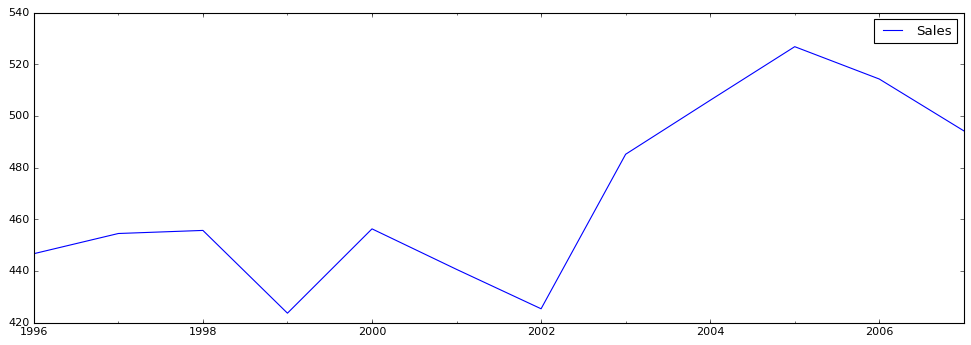

In [6]:
oildata.plot(figsize=(15,5));

Let's continue our Exploratory Analysis of our data. [resource](https://www.itl.nist.gov/div898/handbook/eda/section3/4plot.htm)

1. Run sequence plot (top left) to test fixed location and variation.  

2. Lag Plot (top right) to test randomness.

3. Histogram (bottom left) to test (normal) distribution.  

4. Normal probability plot (bottom right) to test normal distribution.  

Of the 4 underlying assumptions:  
* If the fixed location assumption holds, then the run sequence plot will be flat and non-drifting.
* If the fixed variation assumption holds, then the vertical spread in the run sequence plot will be approximately the same over the entire horizontal axis.
* If the randomness assumption holds, then the lag plot will be structure less and random.
* If the fixed distribution assumption holds (in particular, if the fixed normal distribution assumption holds), then the histogram will be bell-shaped and the normal probability plot will be approximately linear.  
* When the randomness assumption is thus seriously violated, the histogram (lower left) and normal probability plot (lower right) are ignored since determining the distribution of the data is only meaningful when the data are random.

***Conclusions*** - Since we are working with Time Series data, I use the run sequence to look for trends and seasonality. We already covered this from our last chart. The lag plot tells me that there does not seem to be a significant correlation for lag 1 and the data seems to be random. This is not good, we want our data not to be random but have some sort of pattern. Having a pattern means that our data is predictable. If our data was all random then it will not be predictable and we would not be able to use the exponential smoothing models. This will need to be verified with an autocorrelation plot. The histogram and the probability distribution tell me that we are not working with a normally distributed data set.

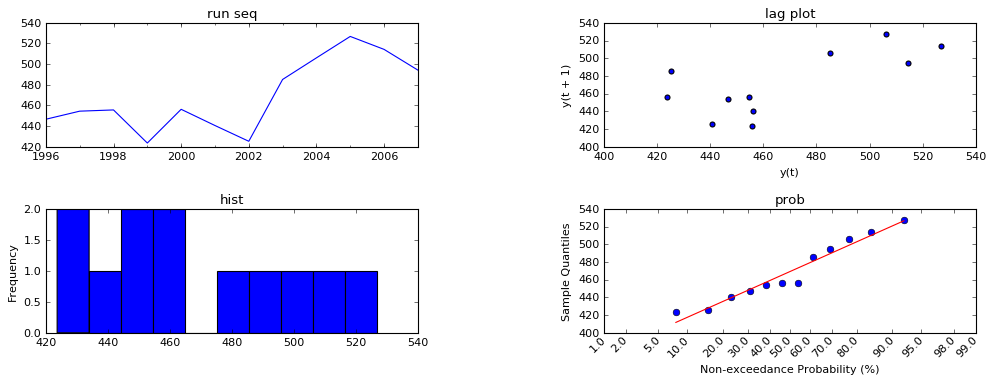

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2)
plt.subplots_adjust(wspace=0.5, hspace=0.5);

oildata['Sales'].plot(ax=axes[0,0], figsize=(15,5)); axes[0,0].set_title('run seq');
lag_plot(oildata['Sales'], ax=axes[0,1]); axes[0,1].set_title('lag plot');
oildata['Sales'].plot.hist(ax=axes[1,0], figsize=(15,5)); axes[1,0].set_title('hist');
sm.ProbPlot(oildata['Sales']).probplot(line='r',ax=axes[1,1]); axes[1,1].set_title('prob');

# Trend and Seasonality in ACF plots

When data has a trend, the autocorrelations for small lags tend to be large and positive because observations nearby in time are also nearby in size. So the ACF of trended time series tend to have positive values that slowly decrease as the lags increase.  

When data are seasonal, the autocorrelations will be larger for the seasonal lags (at multiples of the seasonal frequency) than for other lags.

When data are both trended and seasonal, you see a combination of these effects. 

For white noise series, we expect each autocorrelation to be close to zero. Of course, they will not be exactly equal to zero as there is some random variation. It is common to plot these bounds on a graph of the ACF (the gray solid lines below). If one or more large spikes are outside these bounds, or if substantially more than 5% of spikes are outside these bounds, then the series is probably not white noise.

> The horizontal lines displayed in the plot below correspond to 95% and 99% confidence bands. The dashed line is 99% confidence band.

***conclusion*** - The autocorrelation plot shows a significant value at lag one but at lag 2 we are already in between the confidence bands. This may just mean that the trend for this data set is only present for a short time span and that is probably why the authors of the book did not consider this to be a long-term increase in the data.

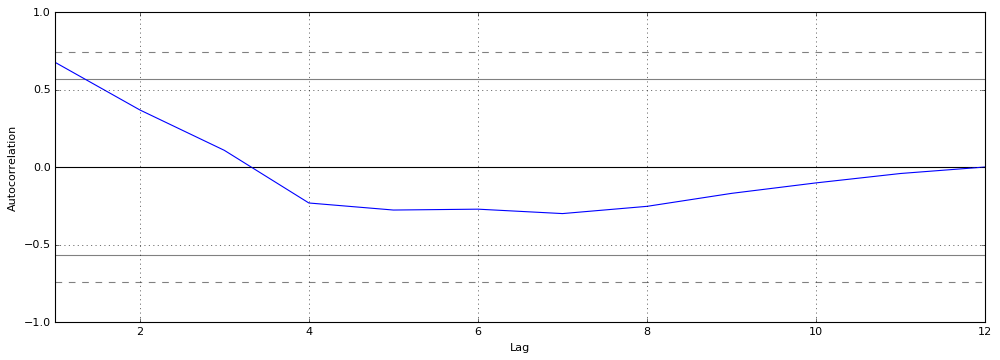

In [8]:
plt.figure(figsize=(15, 5))
autocorrelation_plot(oildata['Sales']);

# Here we run three variants of simple exponential smoothing:

> We want to match the results from [7.1 Simple exponential smoothing](https://www.otexts.org/fpp/7/1)

* In fit1a we do not use the auto optimization but instead choose to explicitly provide the model with the $\alpha=0.2$ parameter
* In fit1b as above we choose an $\alpha=0.6$
* In fit1c we allow statsmodels to automatically find an optimized $\alpha$ value for us. This is the recommended approach.

In [9]:
fit1a = SimpleExpSmoothing(oildata['Sales']).fit(smoothing_level=0.2,optimized=False)
fit1b = SimpleExpSmoothing(oildata['Sales']).fit(smoothing_level=0.6,optimized=False)
fit1c = SimpleExpSmoothing(oildata['Sales']).fit()

The number (3) in the code below is how far in the future we want to make a forecast. The number three was chosen to match the text.  

> note: The ***forecast*** method is what you will use to make future predictions

In [10]:
# rename the pandas object for plotting
fcast1a = fit1a.forecast(3).rename(r'SimpleExp_0.2')
fcast1b = fit1b.forecast(3).rename(r'SimpleExp_0.6')
fcast1c = fit1c.forecast(3).rename(r'SimpleExp')

***level*** - The data under level contains the predictions.

> You can clearly see that letting statsmodels choose your parameters is the way to go. 

┈┈┈┈┈┈▕▔╲  
┈┈┈┈┈┈┈▏▕  
┈┈┈┈┈┈┈▏▕▂▂▂  
▂▂▂▂▂▂╱┈▕▂▂▂▏  
▉▉▉▉▉┈┈┈▕▂▂▂▏  
▉▉▉▉▉┈┈┈▕▂▂▂▏  
▔▔▔▔▔▔╲▂▕▂▂▂▏   

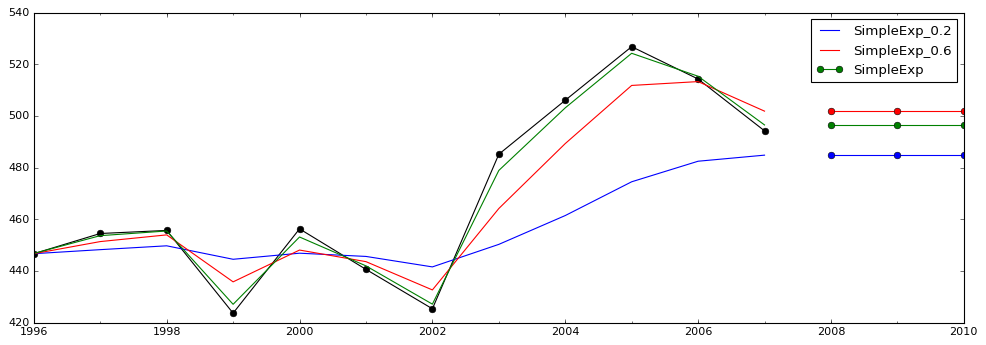

In [11]:
ax = oildata['Sales'].plot(color="black", marker="o", figsize=(15,5))

fit1a.level.plot(ax=ax, color='blue')
fcast1a.plot(ax=ax, color='blue', marker="o", legend=True)

fit1b.level.plot(ax=ax, color='red')
fcast1b.plot(ax=ax, color='red', marker="o", legend=True)

fit1c.level.plot(ax=ax, color='green')
fcast1c.plot(ax=ax, color='green', marker="o", legend=True);

### Add the predictions to your original dataframe

In [12]:
# we add the predictions
oildata['fit1a'] = fit1a.level
oildata['fit1b'] = fit1b.level
oildata['fit1c'] = fit1c.level

# the future predictions get added this way
oildata = pd.concat([oildata, fcast1a.rename('fcast1a')], axis=1)
oildata = pd.concat([oildata, fcast1b.rename('fcast1b')], axis=1)
oildata = pd.concat([oildata, fcast1c.rename('fcast1c')], axis=1)

# make sure the table matches Table 7.2 in chapter 7
oildata

Sales       fit1a       fit1b       fit1c     fcast1a  \
1996-12-31  446.6565  446.656500  446.656500  446.745280         NaN   
1997-12-31  454.4733  448.219860  451.346580  453.638665         NaN   
1998-12-31  455.6630  449.708488  453.936432  455.444370         NaN   
1999-12-31  423.6322  444.493230  435.753893  427.067950         NaN   
2000-12-31  456.2713  446.848844  448.064337  453.117305         NaN   
2001-12-31  440.5881  445.596695  443.578595  441.941268         NaN   
2002-12-31  425.3325  441.543856  432.630938  427.126266         NaN   
2003-12-31  485.1494  450.264965  464.142015  478.882836         NaN   
2004-12-31  506.0482  461.421612  489.285726  503.114310         NaN   
2005-12-31  526.7920  474.495690  511.789490  524.234783         NaN   
2006-12-31  514.2689  482.450332  513.277136  515.345227         NaN   
2007-12-31  494.2110  484.802465  501.837454  496.493520         NaN   
2008-12-31       NaN         NaN         NaN         NaN  484.802465   
2009-12-31       NaN         NaN         NaN         NaN  484.802465   
2010-12-31       NaN         NaN         NaN         NaN  484.802465   

               fcast1b    fcast1c  
1996-12-31         NaN        NaN  
1997-12-31         NaN        NaN  
1998-12-31         NaN        NaN  
1999-12-31         NaN        NaN  
2000-12-31         NaN        NaN  
2001-12-31         NaN        NaN  
2002-12-31         NaN        NaN  
2003-12-31         NaN        NaN  
2004-12-31         NaN        NaN  
2005-12-31         NaN        NaN  
2006-12-31         NaN        NaN  
2007-12-31         NaN        NaN  
2008-12-31  501.837454  496.49352  
2009-12-31  501.837454  496.49352  
2010-12-31  501.837454  496.49352

> What were the final alphas for the three models?  

Statmodels calculates the SSE for us so that we can compare the three models and determine which one has the lowest SSE.

In [13]:
print('fit1a = ', fit1a.model.params['smoothing_level'], 'errors = ', fit1a.sse)
print('fit1b = ', fit1b.model.params['smoothing_level'], 'errors = ', fit1b.sse)
print('fit1c = ', round(fit1c.model.params['smoothing_level'], 1), 'errors = ', fit1c.sse)

fit1a =  0.2 errors =  12391.7548809
fit1b =  0.6 errors =  8098.56120603
fit1c =  0.9 errors =  7573.4263618


# Residuals

The *residuals* in a time series model are what is left over after fitting a model. For many (but not all) time series models, the residuals are equal to the difference between the observations and the corresponding fitted values. Residuals are useful in checking whether a model has adequately captured the information in the data. 

### A good forecasting method will yield residuals with the following properties:

* The residuals are uncorrelated. If there are correlations between residuals, then there is information left in the residuals which should be used in computing forecasts.

* The residuals have zero mean. If the residuals have a mean other than zero, then the forecasts are biased.

Any forecasting method that does not satisfy these properties can be improved. However, that does not mean that forecasting methods that satisfy these properties cannot be improved. It is possible to have several different forecasting methods for the same data set, all of which satisfy these properties. Checking these properties is important in order to see whether a method is using all of the available information, but it is not a good way to select a forecasting method.

If either of these properties is not satisfied, then the forecasting method can be modified to give better forecasts. Adjusting for bias is easy: 

* If the residuals have mean m, then simply add m to all forecasts and the bias problem is solved. 
* Fixing the correlation problem is harder, and we will not address it until [Chapter 9](https://www.otexts.org/fpp/9).

In addition to these essential properties, it is useful (but not necessary) for the residuals to also have the following two properties.

* The residuals have constant variance
* The residuals are normally distributed  

These two properties make the calculation of prediction intervals easier (see Section 3.5 for an example). However, a forecasting method that does not satisfy these properties cannot necessarily be improved. Sometimes applying a Box-Cox transformation may assist with these properties, but otherwise there is usually little that you can do to ensure that your residuals have constant variance and a normal distribution. Instead, an alternative approach to obtaining prediction intervals is necessary. Again, we will not address how to do this until later in the book.

> We will use fitc to calculate the residual as this gave us the best fit

In [14]:
# we remove null values to prevent any issues
res = oildata['Sales'].dropna() - oildata['fit1c'].dropna()

We can see that the variance does not seem constant after the year 2002. We can also see from the bottom two charts that the data is not normal. This just means we will not be able to create confidence bands. The lag plot does show that the residuals are uncorrelated or random.  

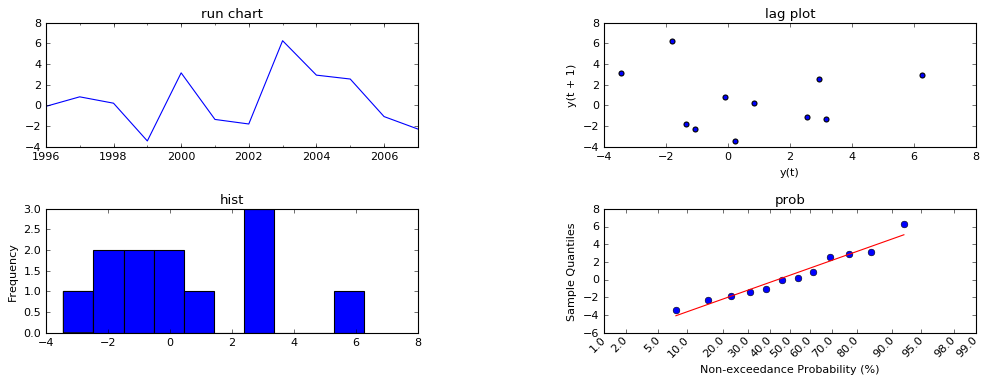

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2)
plt.subplots_adjust(wspace=0.5, hspace=0.5);

res.plot(ax=axes[0,0], figsize=(15,5)); axes[0,0].set_title('run chart');
lag_plot(res, ax=axes[0,1]); axes[0,1].set_title('lag plot');
res.plot.hist(ax=axes[1,0], figsize=(15,5)); axes[1,0].set_title('hist');
sm.ProbPlot(res).probplot(line='r',ax=axes[1,1]); axes[1,1].set_title('prob');

> The ACP confirms that the residuals have no other hidden patterns we can make use of  

Since our ac plot is within the confidence bands our model has no other patterns in the data to work with. While this does not mean you cannot improve the model, it does mean your model should give you good results. 

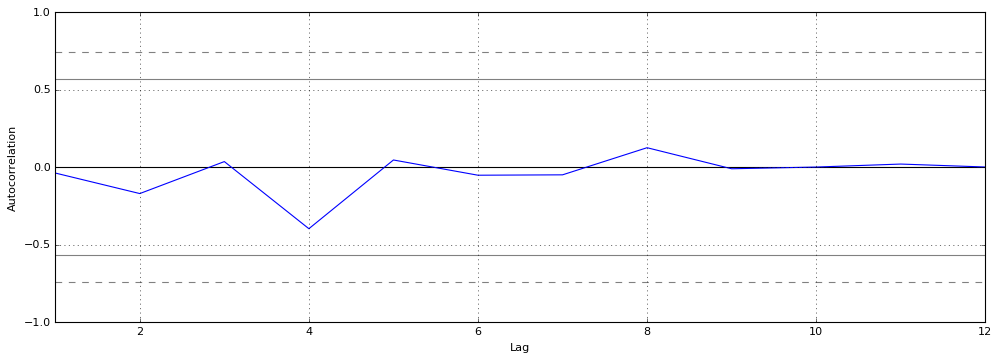

In [16]:
plt.figure(figsize=(15, 5))
autocorrelation_plot(res);

> The mean and the median both are close to zero. This confirms our predictions are not biased.

If a biased existed, you would simply add the amount of the median to all of your predictions. 

In [17]:
res.describe()

count    12.000000
mean      0.494552
std       2.786384
min      -3.435750
25%      -1.463318
50%       0.064925
75%       2.651386
max       6.266564
dtype: float64

<p class="text-muted">This tutorial was created by <a href="http://www.hedaro.com" target="_blank"><strong>HEDARO</strong></a></p>